Create a loader for harmonium files
1) access the data structure and metadata files

Typical structure 
/Users/michelepuppin/Library/CloudStorage/OneDrive-Personal/DATA_ANALISYS/TATE2/DATA/2020/01 January/Day 10/Raw Data/8874

Withing the scan number there is an info.txt and a scan

NOTE THAT IN THE RAW FOLDER there should be "LUT.txt"



In [1]:
#test the os package
import os

#C:\Users\Michele\Documents\GitHub\vscode\specsanalyzer\tests\data\TaTe2\2020\02 February\Day 17\Raw Data\9159\AVG   data folder on office pc, visual studio 

p=os.path.abspath('C:\\Users\\Michele\\Documents\\GitHub\\vscode\\specsanalyzer\\tests\\data\\TaTe2\\2020\\02 February\\Day 17\\Raw Data\\9159\\')
#office PC
#p=os.path.abspath('/Users/michelepuppin/Library/CloudStorage/OneDrive-Personal/DATA_ANALISYS/TATE2/DATA/2020/01 January/Day 10/Raw Data/8875')
filelist=os.listdir(p)
str_match = list(filter(lambda x: 'info.txt' in x, filelist))
print(str_match[0])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Michele\\Documents\\GitHub\\vscode\\specsanalyzer\\tests\\data\\TaTe2\\2020\\02 February\\Day 17\\Raw Data\\9159'

In [4]:
import pandas as pd
fname=os.path.join(p,str_match[0]) 
vname=os.path.splitext(os.path.basename(fname)
)[0]
#better not to use Pandas to get the info.txt file
with open(fname) as f:
    lines = [line.rstrip('\n') for line in f]

In [5]:
lines

['ScanType:delay',
 'Averages:10',
 'Repetitions:1000',
 'LensMode:WideAngleMode',
 'VoltageRange:400V',
 'Exposure:200',
 'Gain:0',
 'Binning:2',
 'ROIbottom:33',
 'ROItop:1',
 'ROIright:43',
 'ROIleft:1',
 'DarkImg:1',
 'KineticEnergy:35.500000',
 'PassEnergy:25.000000',
 'CoilCurrent:3.000000',
 'WorkFunction:0.000000',
 'DetectorVoltage:1350.000000',
 'ScreenVoltage:3000.000000',
 'ConversionVoltage:-18.000000',
 'FocusDisplacement1:0.001500',
 'FocusDisplacement2:0.001500',
 'TimeZero:281.044000']

One should here define a scan object and load these as properties

In [6]:
#let's load an image and start processing it
str_match = list(filter(lambda x: 'AVG' in x, filelist))#get the AVG data folder
#omore simply join the paths
AVG_path=os.path.join(p,'AVG') 
AVG_imagelist=os.listdir(AVG_path)

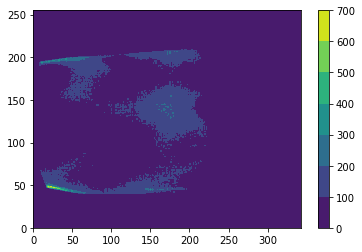

In [10]:
import numpy as np
import matplotlib.pyplot as plt
fname=os.path.join(AVG_path,AVG_imagelist[0]) 
numpy_array = np.loadtxt(fname, delimiter="\t")

h = plt.contourf(numpy_array)
plt.colorbar()
#plt.xlim(120,150)
#plt.ylim(150,200)

one of the first operations should be to filter the image to remove the grid via FFT filtering

FOR ANGULAR CORRECTION LOAD AND SORT IN A MEANINGFUL WAY THE phoibosEPFL_052018.calib2d FILE


THe igor software does an interpolation of the da parameters inside, based on the closest

FIRST the calib2d is loaded in a suitable matrix, see function
DefaultParametersFrom_Calib2D

LEt's insert here the easy loader from 

In [22]:
import numpy as np
import scipy.interpolate as interp
import pandas as pd
import matplotlib.pyplot as plt
#import xarray as xr
#import cartopy.crs as ccrs
#import operator
import json
#from netCDF4 import Dataset
#from scipy.io import netcdf

#We have to insert as an input of the function ParametersTable the text file containing all the parameters, in our case this is phoibosEPFL.txt
#Then, the function ParametersTale will return all the Das value with the corresponding LensMode, aInner and RR parameters as a Matrix



def ParametersTable(file):

    #Here we define the vectors that will contain the value of the file
    
    h=open(file,'r')
    
    Lines=h.readlines()

    start=0
    end=3
    step=1

    jArray=np.arange(start,end+step,step)

    endn=2

    nArray=np.arange(start,endn+step,step)

    endm=1

    mArray=np.arange(start,endm+step,step)

    endl=31

    lArray=np.arange(start,endl+step,step)

    ends=51

    sArray=np.arange(start,ends + step,step)

    endw=124

    wArray=np.arange(start,endw + step,step)

    endz = 32

    zArray=np.arange(start,endz + step,step)


    endp=25

    pArray=np.arange(start,endp+step,step)


    #Here we take the aInner, Das and RR value for the Low angle mode
     
    VLowAng=[]
    
    for l in lArray:
        
        
        for j in jArray:
            A=7
            h=27 + A*l
            Value = [Lines[h + j]]
            
            value_as_dict = []
            for line in Value:
                        name, equal, num1, num2, num3, diez, unit = line.split()
                        val= {}
                        val["name"] = name
                        val["equal"] = equal
                        val["num1"] = num1
                        val["num2"] = num2
                        val["num3"] = num3
                        val["diez"] = diez
                        val["unit"] = unit
               
            
            M=25 + A*l
            Val = Lines[M][22:27]
            param = json.loads(Val)


            N=26 + A*l
            Valu = [Lines[N]]
            Valu_as_dict=[]
            for lin in Valu:
                name, equal, num, diez, unit = lin.split()
                Valu={}
                Valu["name"] = name
                Valu["equal"] = equal
                Valu["num"] = num
                Valu["diez"] = diez
                Valu["unit"] = unit          
    
                
            V=json.loads(num),json.loads(num1),json.loads(num2),json.loads(num3),param
            VLowAng.append(V)
            
            
         #Here we take the aInner, Das and RR value for the med angle mode
       
            
    VMedAng=[]
    
    for l in wArray:
        
        
        for n in nArray:
            A=6
            h=259 + A*l
            Value = [Lines[h + n]]
            
            value_as_dict = []
            for line in Value:
                        name, equal, num1, num2, num3, diez, unit = line.split()
                        val= {}
                        val["name"] = name
                        val["equal"] = equal
                        val["num1"] = num1
                        val["num2"] = num2
                        val["num3"] = num3
                        val["diez"] = diez
                        val["unit"] = unit
                
            
            M=257 + A*l
            Val = Lines[M][25:30]
            param = json.loads(Val)
        
                
            N=258 + A*l
            Valu = [Lines[N]]
            Valu_as_dict=[]
            for lin in Valu:
                name, equal, num, diez, unit = lin.split()
                Valu={}
                Valu["name"] = name
                Valu["equal"] = equal
                Valu["num"] = num
                Valu["diez"] = diez
                Valu["unit"] = unit          
    
            
            V=json.loads(num),json.loads(num1),json.loads(num2),json.loads(num3),param
            VMedAng.append(V)
    
    
    
        #Here we take the aInner, Das and RR value for the high angle mode

    
    VHiAng=[]
    
    for l in sArray:
        
        
        for m in mArray:
            A=5
            h=1019 + A*l
            Value = [Lines[h + m]]
            
            value_as_dict = []
            for line in Value:
                        name, equal, num1, num2, num3, diez, unit = line.split()
                        val= {}
                        val["name"] = name
                        val["equal"] = equal
                        val["num1"] = num1
                        val["num2"] = num2
                        val["num3"] = num3
                        val["diez"] = diez
                        val["unit"] = unit
                        
            
            M=1017 + A*l
            Val = Lines[M][23:28]
            param = json.loads(Val)
      
                  
                
            N=1018 + A*l
            Valu = [Lines[N]]
            Valu_as_dict=[]
            for lin in Valu:
                name, equal, num, diez, unit = lin.split()
                Valu={}
                Valu["name"] = name
                Valu["equal"] = equal
                Valu["num"] = num
                Valu["diez"] = diez
                Valu["unit"] = unit          
    
            
            V=json.loads(num),json.loads(num1),json.loads(num2),json.loads(num3),param
            VHiAng.append(V)
            
            
    
    #Here we take the aInner, Das and RR value for the Wide angle mode
    
    
    VWideAng=[]
    
    for l in zArray:
        
        
        for j in jArray:
            A=7
            h=1287 + A*l
            Value = [Lines[h + j]]
            
            value_as_dict = []
            for line in Value:
                        name, equal, num1, num2, num3, diez, unit = line.split()
                        val= {}
                        val["name"] = name
                        val["equal"] = equal
                        val["num1"] = num1
                        val["num2"] = num2
                        val["num3"] = num3
                        val["diez"] = diez
                        val["unit"] = unit
                   
            
            M=1285 + A*l
            Val = Lines[M][15:19]
            param = json.loads(Val)
         
                
            N=1286 + A*l
            Valu = [Lines[N]]
            Valu_as_dict=[]
            for lin in Valu:
                name, equal, num, diez, unit = lin.split()
                Valu={}
                Valu["name"] = name
                Valu["equal"] = equal
                Valu["num"] = num
                Valu["diez"] = diez
                Valu["unit"] = unit          
    
            
            V=json.loads(num),json.loads(num1),json.loads(num2),json.loads(num3),param
            VWideAng.append(V)
            
            pd.options.display.max_rows=99999 
    return np.concatenate((VLowAng,VMedAng,VHiAng,VWideAng),axis=0)  #Here we return all the value depending on the LensMode in a matrix

#


#############################################################################


#Here, we have to insert as an input the txt file containing the specification of our instrument, in our case this is info.txt
#The function GetParameters will select the aInner, Das and RR value depending on the LensMode
#She also give use the RRArray that contain all the RR value that will be useful to compute the rr_factor with the interpolation
#The function also calculate the RR value corresponding on our measurement and give the cloest RR value this one
#Finally the function return the aInner value corresponding of the RR value and also a matrix with the corresponding Das

#


def GetParameters(infofile,calibfile):
    
    g = open(infofile,'r')
    p= g.readlines()
     
    #We take the value of kinetic energy and pass energy from our file
    
    KE=json.loads(p[13][14:20]) 
    PE= json.loads(p[14][11:20])
    
    #We calculate the retard ratio RR
    
    RR = KE/PE 
          
    start=0
    step=1
    endp=23
    pArray=(start,endp+step,step)
    
    x=p[3] #take the LensMode value
        
    
     #this function return the aInner,Das and RR value depending on our LensMode
    
    def LensMode(x):
        
        if x == "LensMode:LowAngularDispersion\n":
           h = ParametersTable(calibfile)[0:128,0:5]
        if x == "LensMode:MediumAngularDispersion":
           h = ParametersTable(calibfile)[128:502,0:5]
        if x == "LensMode:HighAngularDispersion\n":
           h = ParametersTable(calibfile)[503:606,0:5]
        if x == "LensMode:WideAngleMode\n":
           h = ParametersTable(calibfile)[607:738,0:5]
           return h
       
    print("Our aInner, Das, and RR parameters depending on the LensMode:",LensMode(x)) 
    #Define an array with lenght depending on which LensMode we choose to stock Das and RR value after

    stepInt = 4
    endInt = len(LensMode(x))
    IntArray=np.arange(start,endInt,stepInt)
    
    RRList=[]    
    for b in IntArray:
        
            RRList.append(LensMode(x)[b][4])
            
            
     #define an array with all the value of RR in the LensMode selected       
    RRArray=np.array(RRList)
    print("All the parameters RR value",RRArray)
    
    #This function will return the closest RR value with respect to our value
    
    def closest_valueRR(input_list, input_value):
     
      arr = np.asarray(input_list)
     
      i = (np.abs(arr - input_value)).argmin()  
     
      return arr[i]
     
    if __name__ == "__main__" :
     
       list1 = RRArray

       num=RR
     
       val=closest_valueRR(list1,num)
     
       #print("The closest RR value to our value "+str(num)+" is",val)
       
       
    RRCloseVal=val

    stepDa=4

    DaArray=np.arange(start,endInt,stepDa)
    
    
    #The following Das array take the value for each Da depending on the LensMode selected and also the closest RR value
    
    Da1List=[]
    
    for l in DaArray:
        if LensMode(x)[l][4] == RRCloseVal:
            Da1 = LensMode(x)[l][1],LensMode(x)[l][2],LensMode(x)[l][3]
            Da1List.append(Da1)
            
    Da1=np.array(Da1List)
    
    
    Da3List=[]
    
    for j in DaArray:
        if LensMode(x)[j][4] == RRCloseVal:
            Da3 = LensMode(x)[j+1][1],LensMode(x)[j+1][2],LensMode(x)[j+1][3]
            Da3List.append(Da3)
            
    Da3=np.array(Da3List)
    
    
    
    Da5List=[]
    
    for j in DaArray:
        if LensMode(x)[j][4] == RRCloseVal:
            Da5 = LensMode(x)[j+2][1],LensMode(x)[j+2][2],LensMode(x)[j+2][3]
            Da5List.append(Da5)
            
    Da5=np.array(Da5List)
    
    
    
    
    Da7List=[]
    
    for j in DaArray:
        if LensMode(x)[j][4] == RRCloseVal:
            Da7 = LensMode(x)[j+3][1],LensMode(x)[j+3][2],LensMode(x)[j+3][3]
            Da7List.append(Da7)
            
    Da7=np.array(Da7List)
    
    aInnerVal=[]

    for j in DaArray:
        if LensMode(x)[j][4] == RRCloseVal:
            V=LensMode(x)[j][0]
            aInnerVal.append(V)
    aInner=aInnerVal[0]
    #print("Our aInner value depending on the RR value is:",aInner)
    

    #Create a 3x3 matrix with our DAs value

    Matrix=np.concatenate((Da1,Da3,Da5,Da7),axis=0)
    #print("The matrix of Das parameters linked with the aInner and RR value is:")
    return  Matrix

#print(GetParameters(info))








In [25]:
calib2dfilename="C:\\Users\\Michele\\Documents\\GitHub\\vscode\\specsanalyzer\\tests\\jupyter\\phoibosEPFL.txt"
infofilename="C:\\Users\\Michele\\Documents\\GitHub\\vscode\\specsanalyzer\\tests\\jupyter\\info.txt"
from os.path import exists

file_exists = exists(calib2dfilename)
file_exists

calibrationmatrixfull=ParametersTable(calib2dfilename)
g = open(infofilename,'r')
p= g.readlines()

calibrationmatrixinterp=GetParameters(infofilename,calib2dfilename)

Our aInner, Das, and RR parameters depending on the LensMode: [[ 1.400e+01  5.102e-01  5.761e-01  4.200e-01  1.000e-01]
 [ 1.400e+01 -2.352e-02  7.230e-02  2.424e-01  1.000e-01]
 [ 1.400e+01  2.391e-02 -6.087e-03 -1.908e-02  1.000e-01]
 [ 1.400e+01 -1.339e-02 -1.605e-03 -5.363e-03  1.000e-01]
 [ 1.500e+01  5.839e-01  6.494e-01  6.104e-01  2.000e-01]
 [ 1.500e+01 -1.569e-02  5.095e-02  1.621e-01  2.000e-01]
 [ 1.500e+01  1.359e-02 -1.416e-02 -4.377e-02  2.000e-01]
 [ 1.500e+01 -8.422e-03 -1.879e-04  2.840e-03  2.000e-01]
 [ 1.500e+01  6.459e-01  7.183e-01  7.196e-01  3.000e-01]
 [ 1.500e+01 -2.780e-02  3.312e-02  1.291e-01  3.000e-01]
 [ 1.500e+01  1.291e-02 -1.964e-02 -5.822e-02  3.000e-01]
 [ 1.500e+01 -8.267e-03  1.243e-03  7.881e-03  3.000e-01]
 [ 1.500e+01  6.674e-01  7.306e-01  7.326e-01  3.500e-01]
 [ 1.500e+01 -2.429e-02  3.752e-02  1.330e-01  3.500e-01]
 [ 1.500e+01  9.284e-03 -2.501e-02 -6.670e-02  3.500e-01]
 [ 1.500e+01 -6.816e-03  2.873e-03  1.045e-02  3.500e-01]
 [ 1.500e+